In [17]:
# !pip install gym
# !pip install gym[atari]
# !pip install autorom[accept-rom-license]
# !pip install torch
# !pip install wandb -qU


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import gym 
import matplotlib.pyplot as plt
import torch
from PIL import Image
import wandb
# importing variables and models
from model import *
from variables import *
from utils import *
from torchvision import transforms

A.L.E: Arcade Learning Environment (version 0.8.0+919230b)
[Powered by Stella]


In [2]:
if wb:
    wandb.login()

In [2]:
agent = Policy()

agent.trainer(n_training_episodes=training_episodes, exp_name= 'agent_only_extrinsic_reward')

/home/peppe/anaconda3/envs/my_env/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


1
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

/home/peppe/Desktop/Università/Projects/RL_Project-Generalising_game_environments_with_curiosity-driven_agents/model.py:368: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  args_outer.advantages = torch.cat((args_outer.advantages, torch.tensor(args_inner.advantages, device = self.device).unsqueeze(0)))


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

KeyboardInterrupt: 

In [7]:
agent.load()
evaluate_agent(agent, render = True)

/home/peppe/anaconda3/envs/my_env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


380.0

## Set-up the game

In [4]:
phoenix = "ALE/Phoenix-v5"
space_invaders = "ALE/SpaceInvaders-v5"
assault = "ALE/Assault-v5"



game = env_id = phoenix

env = gym.make(env_id, render_mode = 'human')


## Show some steps of the chosen game

In [3]:
env.reset()
for episode in range(1):
        total_reward = 0
        done = False
        s, _ = env.reset()
        for i in range(128):
            
            action = env.action_space.sample()
            s, reward, done, truncated, info = env.step(action)
            env.render()

/home/peppe/anaconda3/envs/my_env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [ ]:
# observation = env.reset()

# for i in range(25):
  
#   if i > 20:
#     print(observation.shape)
#     plt.imshow(observation[10:187,:,:])#    phoenix: observation[17:179,:,:]), space_invaders: observation[20:195,:,:], assault: observation[10:187,:,:]
#     plt.show()

#   observation, _, _, _, _ = env.step(1)

### Display the result of the image transformation.

In [3]:
phoenix_game = np.load('./images/phoenix.npy')
space_invaders_game = np.load('./images/space_invaders.npy')
assault_game = np.load('./images/assault.npy')

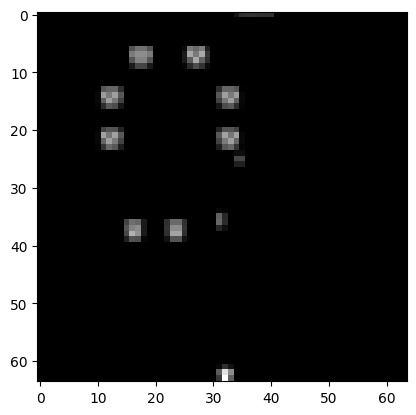

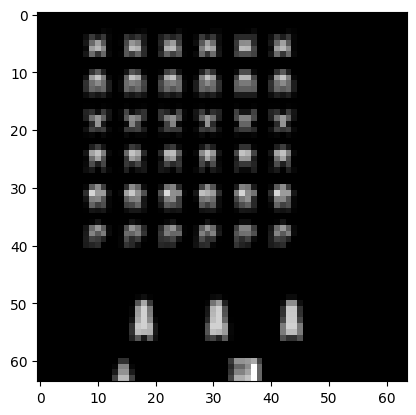

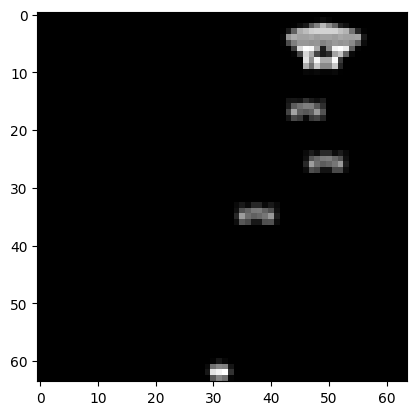

In [9]:
import time
def plot_nparray_with_torch_transform(np_array):
    ''' This function takes as input a numpy array, it applies all the desired transformation with torchvision.transforms, and then it display the new representation 
        INPUT: np_array: It's a numpy array,
        OUTPUT: ----        '''
    observation_new = transform(Image.fromarray(np_array))
    observation_new = np.array(observation_new)/255
    plt.imshow((observation_new), cmap = 'gray')
    plt.show()

plot_nparray_with_torch_transform(phoenix_game)
time.sleep(1)
plot_nparray_with_torch_transform(space_invaders_game)
time.sleep(1)
plot_nparray_with_torch_transform(assault_game)



tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)